# Models for unsupervised learning

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style='whitegrid')

import sklearn.cluster as skc
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [4]:
df = pd.read_csv("insurance.csv")

First we will try fitting a basic k-means with 3 clusters, using the age and charges columns of our dataframe

In [5]:
kmeans = skc.KMeans(n_clusters=3)
kmeans.fit(df[["age", "charges"]])

KMeans(n_clusters=3)

We predict with the same data, and assign colors to each cluster

In [6]:
Z = kmeans.predict(df[["age", "charges"]])
colors = ["orange", "blue", "green"]
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

We now plot the clustering, with crosses representing the clusters' centroids.

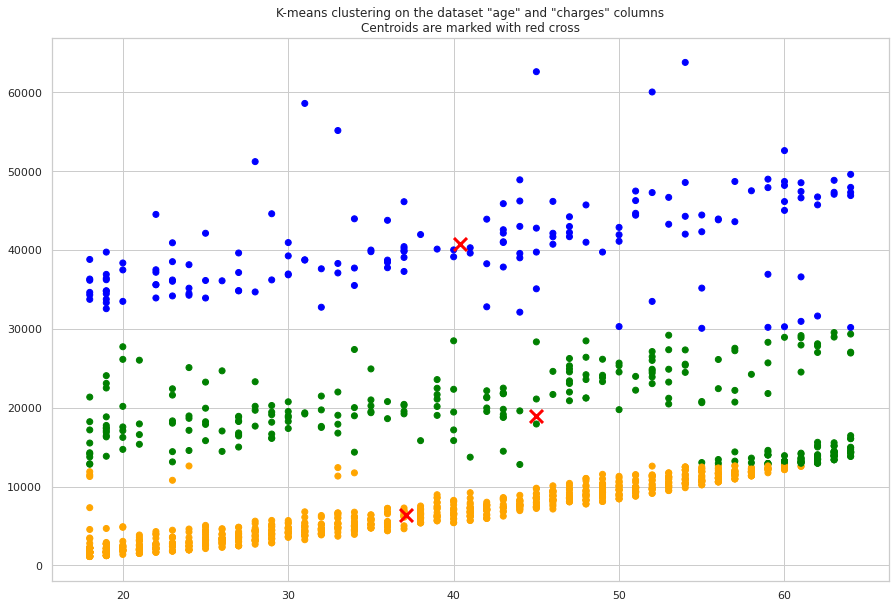

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(df["age"], df["charges"], c=Z_c)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "K-means clustering on the dataset \"age\" and \"charges\" columns\n"
    "Centroids are marked with red cross"
)
plt.show()

Now we will try using the other categorical values, to do this we will factorise the columns

In [8]:
df['sex'].replace({"female":1, "male":0}, inplace=True)
df['smoker'].replace({"yes":1, "no":0}, inplace=True)
df['region'].replace({"northeast":0, "northwest":1,"southeast":2, "southwest":3}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


To train using all these columns, we will construct new training data by using a PCA and keeping the first 2 principal components

In [9]:
X = df[["age", "charges", "bmi", "sex", "children", "smoker", "region"]]
reduced_data = PCA(n_components=2).fit_transform(X)

We can train again using kmeans clustering with this new data

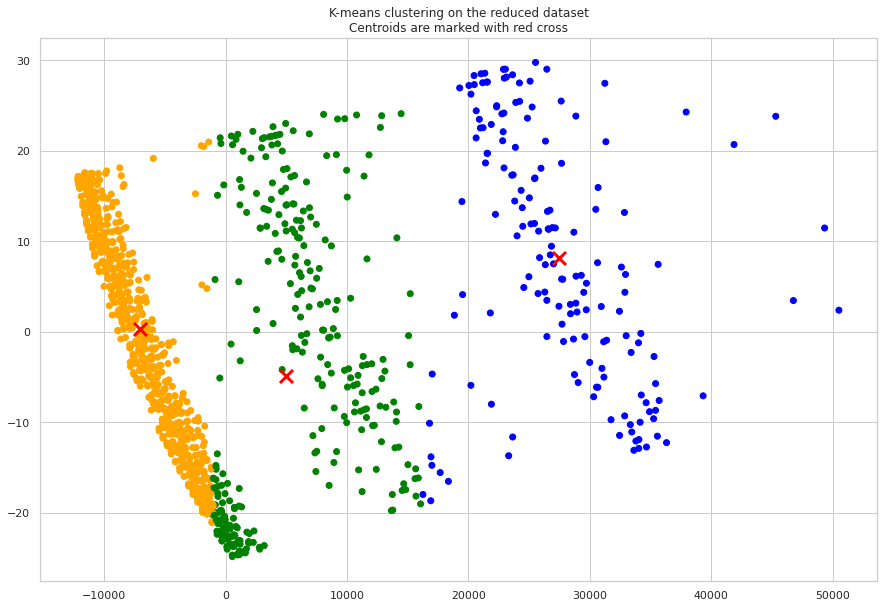

In [10]:
kmeans.fit(reduced_data)
Z = kmeans.predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "K-means clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train again using Minibatch kmeans clustering, and still 3 clusters. 

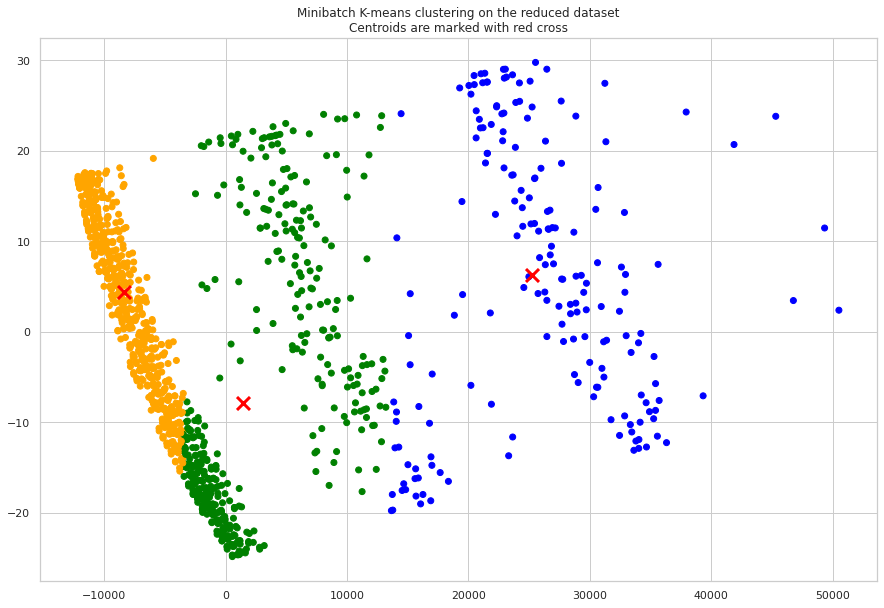

In [11]:
mkmeans = skc.MiniBatchKMeans(n_clusters=3)
Z = mkmeans.fit_predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = mkmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "Minibatch K-means clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train using Mean Shift clustering.

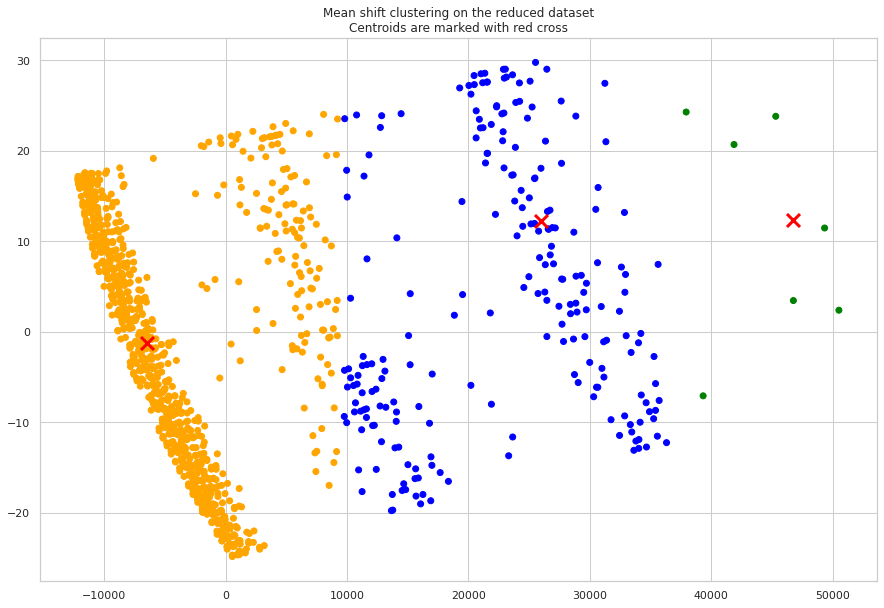

In [12]:
bandwith = skc.estimate_bandwidth(df, quantile=0.3)
ms = skc.MeanShift(bandwidth=bandwith,bin_seeding=True)
Z = ms.fit_predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = ms.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "Mean shift clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train using spectral clustering. This requires to rescale the data, to do so we use a standard scaler.

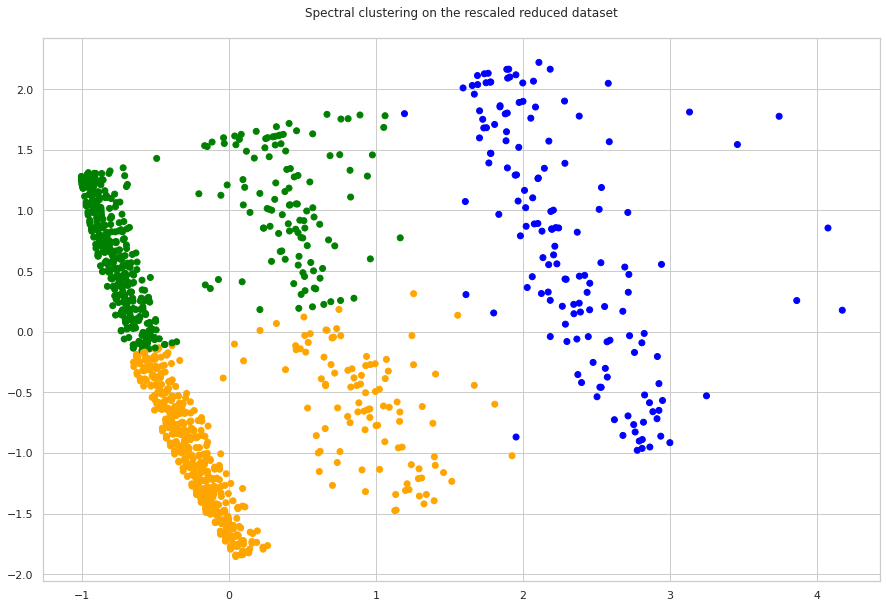

In [14]:
rdn = preprocessing.StandardScaler().fit_transform(reduced_data)

sc = skc.SpectralClustering(n_clusters=3)

Z = sc.fit_predict(rdn)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

plt.figure(figsize=(15,10))
plt.scatter(rdn[:,0], rdn[:,1], c=Z_c)

plt.title(
    "Spectral clustering on the rescaled reduced dataset\n"
)
plt.show()

Finally we will train using DBSCAN, with maximum distance *eps* of 0.25.

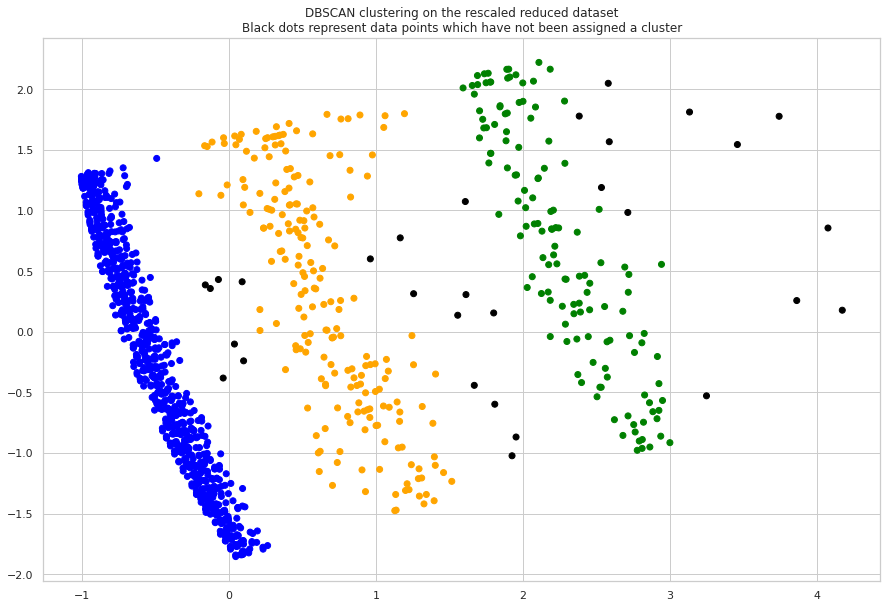

In [15]:
dbs = skc.DBSCAN(eps=0.25)

Z = dbs.fit_predict(rdn)
colors = ["orange", "blue", "green", "black"]
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

plt.figure(figsize=(15,10))
plt.scatter(rdn[:,0], rdn[:,1], c=Z_c)

plt.title(
    "DBSCAN clustering on the rescaled reduced dataset\n"
    "Black dots represent data points which have not been assigned a cluster"
)
plt.show()